### 데이터프레임 생성

In [9]:
import os
import json
import pandas as pd

In [10]:

filtered_folder = 'C:/Users/SSAFY/Desktop/filtered_output'
all_records = []


for fname in os.listdir(filtered_folder):
    if fname.endswith('.json') and fname.startswith('filtered_'):
        file_path = os.path.join(filtered_folder, fname)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        # 각 시계열 entry를 하나의 행으로 구성
        for entry in data:
            row = {
                'TimeStamp': entry.get('TimeStamp'),
                'Age': entry.get('Age'),
                'Gender': entry.get('Gender'),
                'DiseaseYN': entry.get('DiseaseYN'),
                'Temperature': entry['EM_Sensor'].get('Temperature'),
                'Humidity': entry['EM_Sensor'].get('Humidity'),
                'Illuminance': entry['EM_Sensor'].get('Illuminance'),
                'TVOC': entry['EM_Sensor'].get('TVOC'),
                'HeartRate': entry['SM_Sensor'].get('HeartRate'),
                'SPO2': entry['SM_Sensor'].get('SPO2'),
                'SkinTemperature': entry['SM_Sensor'].get('SkinTemperature'),
                'WalkingSteps': entry['SM_Sensor'].get('WalkingSteps')
            }
            all_records.append(row)

In [11]:
# DataFrame 생성
df = pd.DataFrame(all_records)
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)

### 결측치확인

In [4]:
# 결측치 및 타입 확인
print(df.info())      

# 수치형 변수 기초 통계   
print(df.describe())     

# 결측치 수 확인
print(df.isnull().sum()) 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78804 entries, 2024-10-04 15:20:00 to 2024-11-23 23:20:00
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              78804 non-null  int64  
 1   Gender           78804 non-null  int64  
 2   DiseaseYN        78804 non-null  int64  
 3   Temperature      78804 non-null  float64
 4   Humidity         78804 non-null  float64
 5   Illuminance      78804 non-null  float64
 6   TVOC             78804 non-null  float64
 7   HeartRate        78804 non-null  int64  
 8   SPO2             78804 non-null  int64  
 9   SkinTemperature  78804 non-null  float64
 10  WalkingSteps     78804 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 7.2 MB
None
                Age        Gender  DiseaseYN   Temperature      Humidity  \
count  78804.000000  78804.000000    78804.0  78804.000000  78804.000000   
mean      72.790214      0.579209        0.0     24

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

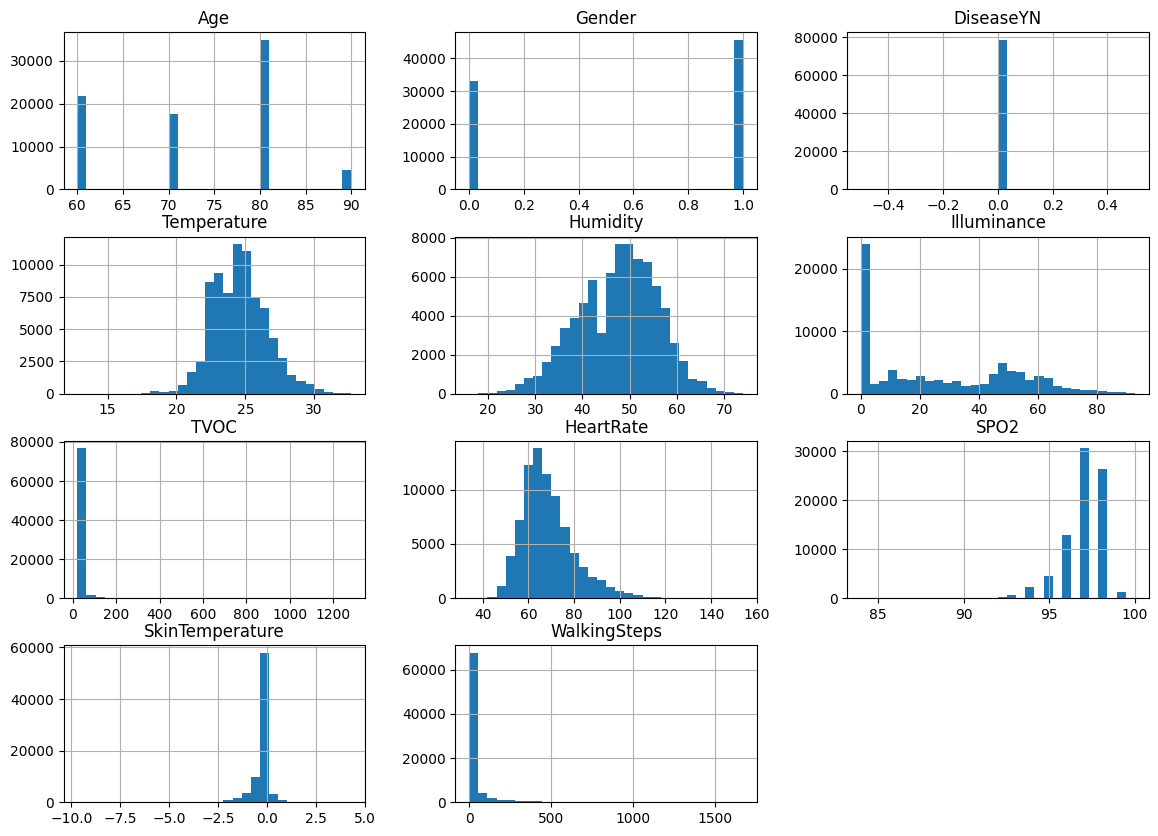

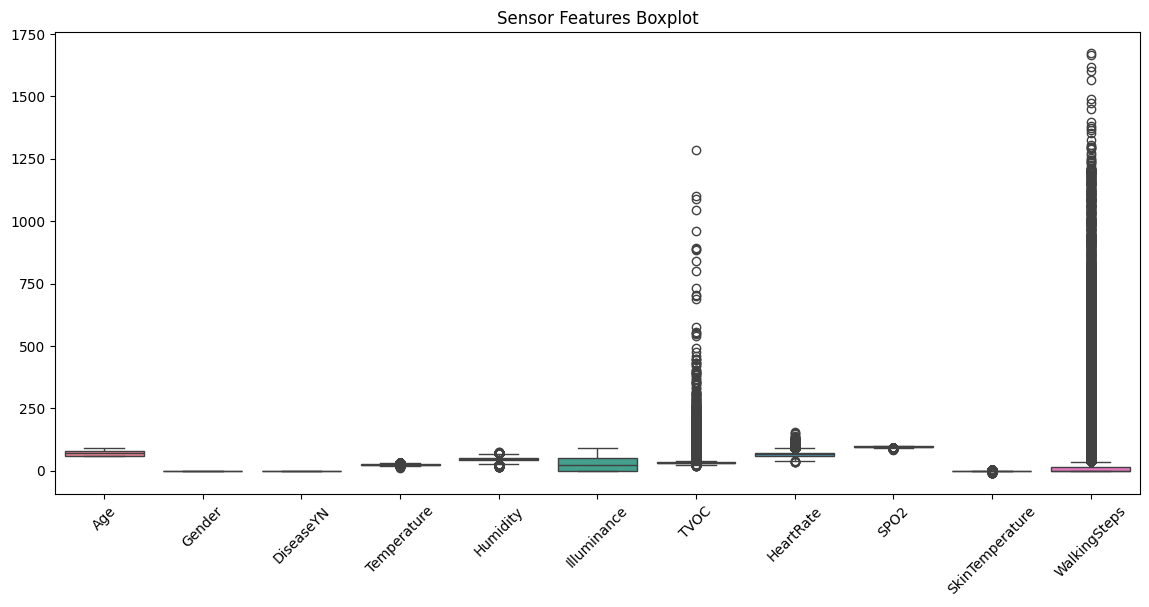

In [7]:
# 히스토그램
df.hist(figsize=(14, 10), bins=30)
# plt.tight_layout()
plt.show()

# 박스플롯 (이상치 탐색)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Sensor Features Boxplot")
plt.show()


### 상관관계분석

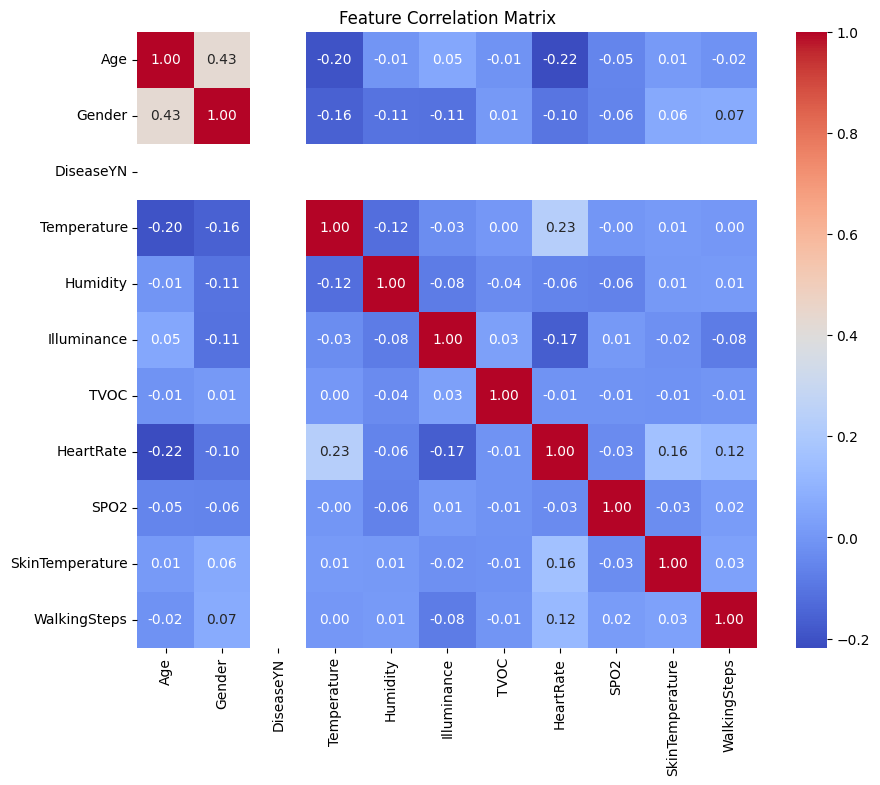

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### 이상치

In [13]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()
outlier_cols = [col for col in df.columns if col not in ['Gender', 'DiseaseYN', 'Age']]
for c in outlier_cols:
    print(f"{c}: {count_outliers_iqr(df, c)}건 이상치 감지됨")


Temperature: 995건 이상치 감지됨
Humidity: 522건 이상치 감지됨
Illuminance: 0건 이상치 감지됨
TVOC: 7262건 이상치 감지됨
HeartRate: 2911건 이상치 감지됨
SPO2: 387건 이상치 감지됨
SkinTemperature: 14020건 이상치 감지됨
WalkingSteps: 13663건 이상치 감지됨
